In [17]:
import pandas as pd

all_games_df = pd.read_csv("data/all_games.csv")
all_games_df.drop("Unnamed: 0", axis=1,inplace=True)

# Data Preparation

In [18]:
from api_helpers.game_stats_helpers import load_past_n_games
columns = ["FG_PCT", "FG3_PCT", "FTM", "OREB", "DREB", "REB", "AST"]
columns_a = [column + "_A" for column in columns]
columns_b = [column + "_B" for column in columns]

n_games_df = load_past_n_games(all_games_df=all_games_df, columns=columns)
n_games_df = n_games_df.dropna()

In [19]:
merged_data = pd.merge(
    all_games_df[columns_a + columns_b], n_games_df, left_index=True, right_index=True
)


columns_x = columns_a + columns_b
columns_x = [column + "_x" for column in columns_x]
X = merged_data[columns_x]
X

,FG_PCT_A_x,FG3_PCT_A_x,FTM_A_x,OREB_A_x,DREB_A_x,REB_A_x,AST_A_x,FG_PCT_B_x,FG3_PCT_B_x,FTM_B_x,OREB_B_x,DREB_B_x,REB_B_x,AST_B_x
49,0.560,0.441,13,11.0,37.0,48.0,24,0.489,0.438,11,6.0,23.0,29.0,31
59,0.500,0.294,15,13.0,35.0,48.0,24,0.547,0.476,10,5.0,35.0,40.0,35
63,0.588,0.536,21,5.0,37.0,42.0,28,0.455,0.371,26,10.0,25.0,35.0,20
83,0.416,0.219,10,14.0,31.0,45.0,21,0.545,0.457,9,6.0,43.0,49.0,29
84,0.443,0.231,20,11.0,43.0,54.0,19,0.386,0.200,25,9.0,36.0,45.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52799,0.443,0.500,17,11.0,32.0,43.0,27,0.422,0.750,22,15.0,36.0,51.0,14
52800,0.544,0.000,11,11.0,33.0,44.0,29,0.488,0.500,27,11.0,28.0,39.0,21
52801,0.461,0.000,29,10.0,31.0,41.0,23,0.420,0.000,10,20.0,33.0,53.0,15
52804,0.413,0.500,21,21.0,24.0,45.0,25,0.517,0.333,14,16.0,30.0,46.0,22


In [20]:
columns_y = columns_a + columns_b
columns_y = [column + "_y" for column in columns_y]
y = merged_data[columns_y]
y

,FG_PCT_A_y,FG3_PCT_A_y,FTM_A_y,OREB_A_y,DREB_A_y,REB_A_y,AST_A_y,FG_PCT_B_y,FG3_PCT_B_y,FTM_B_y,OREB_B_y,DREB_B_y,REB_B_y,AST_B_y
49,0.4448,0.3758,17.4,14.0,31.6,45.6,22.4,0.4960,0.3890,15.8,9.4,31.8,41.2,25.8
59,0.4878,0.3468,20.8,16.0,33.4,49.4,25.4,0.5096,0.4064,14.2,8.6,32.0,40.6,27.2
63,0.5242,0.4392,17.8,10.8,33.4,44.2,24.6,0.4738,0.3202,16.4,7.6,33.6,41.2,25.8
83,0.4634,0.3002,16.8,11.0,34.4,45.4,23.0,0.5196,0.4400,13.4,7.4,35.4,42.8,28.8
84,0.4406,0.2750,19.0,10.8,36.8,47.6,22.0,0.4636,0.3722,25.6,9.8,33.8,43.6,24.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52799,0.4458,0.2966,17.8,14.4,30.2,44.6,25.8,0.4440,0.2966,23.2,13.4,31.4,44.8,18.8
52800,0.4710,0.2166,16.2,13.2,31.2,44.4,26.8,0.4714,0.2240,27.0,14.0,30.0,44.0,21.0
52801,0.4734,0.2166,18.0,12.8,32.0,44.8,26.4,0.4818,0.1666,17.6,14.8,32.2,47.0,20.4
52804,0.4760,0.2000,18.6,13.4,27.4,40.8,24.0,0.4562,0.3632,22.0,14.6,31.0,45.6,19.2


# Neural Network

In [21]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [7]:
len(y_train.columns)

14

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.utils import to_categorical
import pickle
from sklearn.preprocessing import StandardScaler


# # Assuming `scaler` is your fitted StandardScaler instance
# with open('scaler.bin', 'wb') as f:
#     pickle.dump(scaler, f)

In [33]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

def model_builder(hp):
    model = Sequential()

    hp_units = hp.Int("units", min_value=16, max_value=128, step=32)

    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])

    activations = hp.Choice("activation", values=["relu", "tanh"])
    final_activations = hp.Choice("activation", values=["softmax", "sigmoid"])

    model.add(keras.Input(shape=(14,)))
    model.add(Dropout(hp.Float("dropout", min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp_units, activation=activations))
    model.add(Dropout(hp.Float("dropout", min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp_units, activation=activations))
    model.add(Dropout(hp.Float("dropout", min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp_units, activation=activations))
    model.add(Dropout(hp.Float("dropout", min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(14, activation="sigmoid"))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model


tuner = kt.Hyperband(
    model_builder,
    objective="val_accuracy",
    max_epochs=10,
    factor=3,
    directory="my_dir",
    project_name="new",
)

print(tuner)

stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)

tuner.search(X_train, y_train, epochs=5,
             validation_split=0.2, callbacks=[stop_early])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

print(best_hps)

print(
    f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
"""
)

Trial 30 Complete [00h 00m 10s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.6278951168060303
Total elapsed time: 00h 03m 46s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 112 and the optimal learning rate for the optimizer
is 0.01.



In [34]:
test_model = model

results = test_model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

Epoch 1/50
983/983 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2624 - loss: 842421633024.0000 - val_accuracy: 0.3721 - val_loss: 12557281656832.0000
Epoch 2/50
983/983 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2991 - loss: 31175722663936.0000 - val_accuracy: 0.3721 - val_loss: 94064884056064.0000
Epoch 3/50
983/983 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3122 - loss: 160615737851904.0000 - val_accuracy: 0.3721 - val_loss: 302686108909568.0000
Epoch 4/50
983/983 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3121 - loss: 436893938352128.0000 - val_accuracy: 0.3721 - val_loss: 725991408271360.0000
Epoch 5/50
983/983 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3111 - loss: 972021227847680.0000 - val_accuracy: 0.3721 - val_loss: 1350183770128384.0000
Epoch 6/50
983/983 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3174 - loss: 1705192747696128.0000 - val_accuracy: 0.3721 - val_loss: 2260583021805568.0000


In [36]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Best Neural Network accuracy: {accuracy * 100:.2f}%")

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.3690 - loss: 2259649403289600.0000
Best Neural Network accuracy: 37.28%


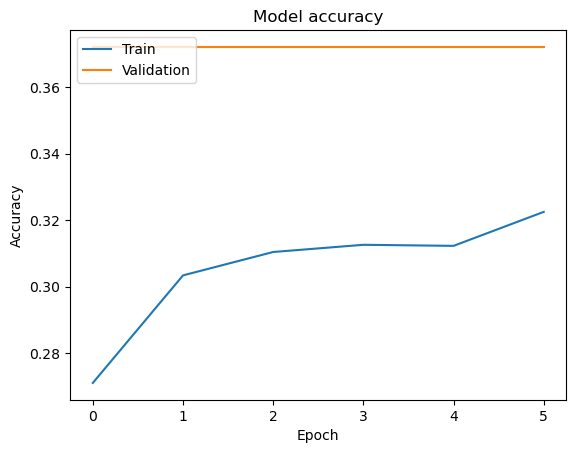

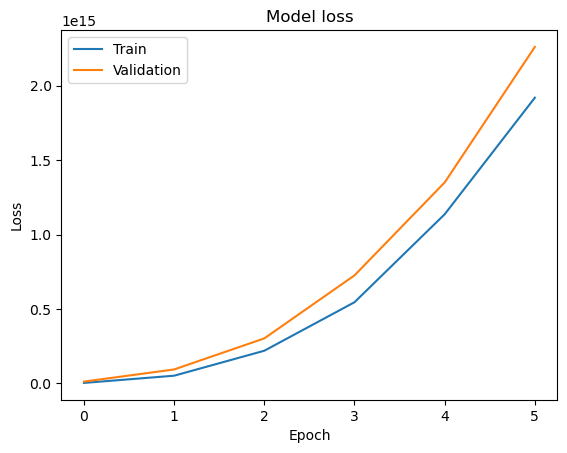

In [37]:
import matplotlib.pyplot as plt

# history = model.fit(X_train, y_train, epochs=70, validation_split=0.2)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

rfe = RandomForestRegressor(random_state=10, n_estimators=100)
rfe.fit(X_train,y_train)
y_pred = rfe.predict(X_test)

In [53]:
y_pred = rfe.predict(X_test)

In [45]:
rfe.score(X_test, y_test)

0.27606794994845363

In [89]:
# evaluate multioutput regression model with k-fold cross-validation
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# define model
rfe = RandomForestRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(rfe, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 1.568 (0.007)


In [93]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
from sklearn.model_selection import GridSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [98]:
rf_tuned = RandomizedSearchCV(estimator=rfe,param_distributions=random_grid,n_iter=5,cv=2,random_state=42,n_jobs=4)
rf_tuned.fit(X_train, y_train)

/home/rohanbendapudi/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
4 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/home/rohanbendapudi/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rohanbendapudi/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/rohanbendapudi/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraint

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=5, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42)

In [38]:
y_pred = rf_tuned.predict(X_test)

NameError: name 'rf_tuned' is not defined

# Alternate Three Step Pipeline

In [40]:
y_pred = model.predict(X_test)
print(y_pred)

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [41]:
from tensorflow.keras.models import model_from_json

# load json and create model
json_file = open("tuned_nn.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("tuned.weights.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

Loaded model from disk


In [56]:
y_test

,FG_PCT_A_y,FG3_PCT_A_y,FTM_A_y,OREB_A_y,DREB_A_y,REB_A_y,AST_A_y,FG_PCT_B_y,FG3_PCT_B_y,FTM_B_y,OREB_B_y,DREB_B_y,REB_B_y,AST_B_y
8943,0.4750,0.3524,21.0,9.2,32.0,41.2,20.6,0.4918,0.4124,16.2,8.0,32.8,40.8,22.8
6688,0.4708,0.3318,16.2,12.0,35.4,47.4,27.0,0.4170,0.3318,18.4,11.2,29.4,40.6,19.6
31600,0.4508,0.3094,19.8,17.2,31.8,49.0,24.0,0.4648,0.3860,18.6,14.0,24.0,38.0,21.8
31387,0.4894,0.3800,19.6,11.2,29.2,40.4,23.6,0.4108,0.1644,15.8,17.2,26.0,43.2,17.0
40328,0.4428,0.3584,18.6,14.6,29.8,44.4,18.2,0.4944,0.3986,11.0,8.6,30.2,38.8,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,0.4578,0.2878,26.2,12.0,26.6,38.6,25.8,0.3820,0.2464,18.6,15.2,23.0,38.2,15.6
8778,0.4320,0.3646,16.8,8.6,36.2,44.8,22.6,0.4722,0.3628,20.4,10.6,34.2,44.8,25.8
41759,0.4698,0.3120,20.4,14.0,39.0,53.0,21.2,0.4570,0.3042,14.2,10.0,29.0,39.0,17.4
28381,0.4982,0.2618,27.0,14.6,31.2,45.8,28.2,0.4444,0.3350,15.6,11.0,27.0,38.0,24.8


In [70]:
y_test

,FG_PCT_A_y,FG3_PCT_A_y,FTM_A_y,OREB_A_y,DREB_A_y,REB_A_y,AST_A_y,FG_PCT_B_y,FG3_PCT_B_y,FTM_B_y,OREB_B_y,DREB_B_y,REB_B_y,AST_B_y
8943,0.4750,0.3524,21.0,9.2,32.0,41.2,20.6,0.4918,0.4124,16.2,8.0,32.8,40.8,22.8
6688,0.4708,0.3318,16.2,12.0,35.4,47.4,27.0,0.4170,0.3318,18.4,11.2,29.4,40.6,19.6
31600,0.4508,0.3094,19.8,17.2,31.8,49.0,24.0,0.4648,0.3860,18.6,14.0,24.0,38.0,21.8
31387,0.4894,0.3800,19.6,11.2,29.2,40.4,23.6,0.4108,0.1644,15.8,17.2,26.0,43.2,17.0
40328,0.4428,0.3584,18.6,14.6,29.8,44.4,18.2,0.4944,0.3986,11.0,8.6,30.2,38.8,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,0.4578,0.2878,26.2,12.0,26.6,38.6,25.8,0.3820,0.2464,18.6,15.2,23.0,38.2,15.6
8778,0.4320,0.3646,16.8,8.6,36.2,44.8,22.6,0.4722,0.3628,20.4,10.6,34.2,44.8,25.8
41759,0.4698,0.3120,20.4,14.0,39.0,53.0,21.2,0.4570,0.3042,14.2,10.0,29.0,39.0,17.4
28381,0.4982,0.2618,27.0,14.6,31.2,45.8,28.2,0.4444,0.3350,15.6,11.0,27.0,38.0,24.8


# Accuracy Prediction

In [145]:
y_final_true = all_games_df["WL_A"].loc[y_test.index].to_frame()
y_final_true.replace("W",1,inplace=True)
y_final_true.replace("L",0,inplace=True)
y_final_true.replace(" ",0,inplace=True)
y_final_true = list(y_final_true["WL_A"])

/tmp/ipykernel_146036/583459057.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_final_true.replace(" ",0,inplace=True)


In [146]:
for i, item, in enumerate(y_final_true):
    if isinstance(item, str):
        print(item)

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
<class 'int'>
True
Best Neural Network classification report:
              precision    recall  f1-score   support

           0       0.91      0.30      0.45      3922
           1       0.68      0.98      0.80      5900

    accuracy                           0.71      9822
   macro avg       0.79      0.64      0.62      9822
weighted avg       0.77      0.71      0.66      9822



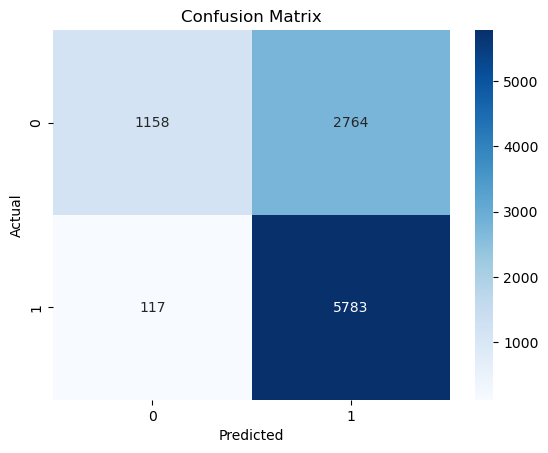

In [148]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import joblib

scaler = joblib.load("scaler.bin")

y_final_pred = loaded_model.predict(scaler.transform(y_pred))
y_pred_true = np.argmax(y_final_pred, axis=1)

y_pred_true = y_pred_true.tolist()
print(type(y_pred_true[0]))

print(all(isinstance(x, int) for x in y_final_true))

# Evaluate the model
print('Best Neural Network classification report:')
print(classification_report(y_final_true, list(y_pred_true)))

# Confusion matrix
conf_matrix_nn = confusion_matrix(y_final_true, list(y_pred_true))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step
[1 1 1 ... 1 1 0]
[5 5 5 ... 5 5 5]
Best Neural Network classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00    6160.0
          12       0.00      0.00      0.00    3662.0

    accuracy                           0.00    9822.0
   macro avg       0.00      0.00      0.00    9822.0
weighted avg       0.00      0.00      0.00    9822.0



/home/rohanbendapudi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rohanbendapudi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rohanbendapudi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/

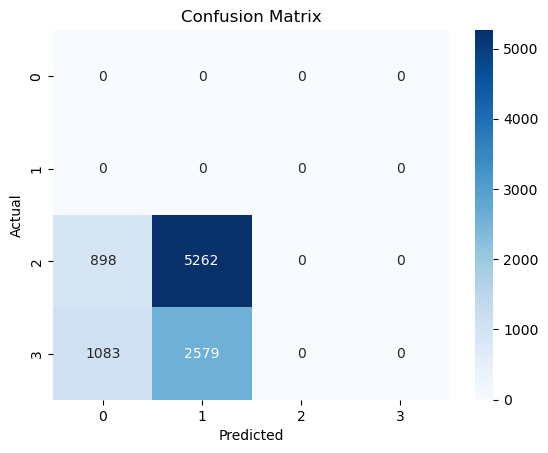